# Observed Trends
1) The max temperature peaks near the equator. When the latitude increases positively (towards North), the max temperature drops. 

2) Humidity and cloudiness do not seem to be correlated to latitude as there is a relatively uniform spread across the different latitude points. 

3) The majority of cities have a windspeed under 20 mph. 

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import random
!pip install citipy
from citipy import citipy
#set style for plots
plt.style.use("seaborn")


# Representative Sample

In [2]:
#Creating list of lats/lngs
lats = range(-90, 90)
lngs = range(-180, 180)
city_list = []
for lat in lats:
    for lng in lngs:
        city = citipy.nearest_city(lat, lng)
        city_name = city.city_name
        city_list.append(city_name)
# Do some cleaning (remove duplicates)
city_df = pd.DataFrame(city_list)
new_city_df = city_df.drop_duplicates()

In [3]:
#Extracting sample cities
sampled_cities = new_city_df.sample(700)
sampled_cities = sampled_cities.reset_index(drop = True)
sampled_cities.columns = ["City"]
sampled_cities.index += 1 
sampled_cities["Lat"] = ""
sampled_cities["Lng"] = ""
sampled_cities["Country"] = ""
sampled_cities["Date"] = ""
sampled_cities["Max Temp"] = ""
sampled_cities["Humidity"] = ""
sampled_cities["Cloudiness"] = ""
sampled_cities["Wind Speed"] = ""
sampled_cities.head()

,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,seredka,,,,,,,,
2,nikolayevsk-na-amure,,,,,,,,
3,qingdao,,,,,,,,
4,kumukh,,,,,,,,
5,were ilu,,,,,,,,


# OpenWeatherMap API Weather Check

In [4]:
filename = 'apikey'
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)
api_key = get_file_contents(filename)

In [5]:
units = "Imperial"
print("Beginning Data Retrieval")
print("-------------------------------")
for index,row in sampled_cities.iterrows():
    city_name = row["City"]
    city_url_name = city_name.replace(" ", "%20")
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, api_key, city_url_name)
    city_weather = requests.get(target_url).json()
    sampled_cities.set_value(index,"Lat",city_weather.get("coord",{}).get("lat"))
    sampled_cities.set_value(index,"Lng",city_weather.get("coord",{}).get("lon"))
    sampled_cities.set_value(index,"Country",city_weather.get("sys",{}).get("country"))
    sampled_cities.set_value(index,"Date",city_weather.get("dt",{}))
    sampled_cities.set_value(index,"Max Temp",city_weather.get("main",{}).get("temp_max"))
    sampled_cities.set_value(index,"Humidity",city_weather.get("main",{}).get("humidity"))
    sampled_cities.set_value(index,"Cloudiness",city_weather.get("clouds",{}).get("all"))
    sampled_cities.set_value(index,"Wind Speed",city_weather.get("wind",{}).get("speed"))
    print("Processing Record " + str(index) + " of 700 | " + str(city_name))
    print_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units, "api_id", city_url_name)
    print(print_url)
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of 700 | seredka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=seredka
Processing Record 2 of 700 | nikolayevsk-na-amure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nikolayevsk-na-amure
Processing Record 3 of 700 | qingdao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=qingdao
Processing Record 4 of 700 | kumukh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kumukh
Processing Record 5 of 700 | were ilu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=were%20ilu
Processing Record 6 of 700 | jatai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=jatai
Processing Record 7 of 700 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=saint%20anthony
Processing Record 8 of 700 | bahia de caraquez
http

Processing Record 66 of 700 | imabari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=imabari
Processing Record 67 of 700 | ibicui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ibicui
Processing Record 68 of 700 | kilkis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kilkis
Processing Record 69 of 700 | nederland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nederland
Processing Record 70 of 700 | omutinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=omutinskoye
Processing Record 71 of 700 | cintalapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cintalapa
Processing Record 72 of 700 | dauriya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=dauriya
Processing Record 73 of 700 | xicotencatl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=xicotenc

Processing Record 131 of 700 | karatau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=karatau
Processing Record 132 of 700 | shakawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=shakawe
Processing Record 133 of 700 | si sa ket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=si%20sa%20ket
Processing Record 134 of 700 | sovetskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sovetskaya
Processing Record 135 of 700 | mantua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=mantua
Processing Record 136 of 700 | lithgow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lithgow
Processing Record 137 of 700 | amboise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=amboise
Processing Record 138 of 700 | svencioneliai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&

Processing Record 196 of 700 | veseloyarsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=veseloyarsk
Processing Record 197 of 700 | jimma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=jimma
Processing Record 198 of 700 | goryachegorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=goryachegorsk
Processing Record 199 of 700 | dargaville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=dargaville
Processing Record 200 of 700 | hollins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=hollins
Processing Record 201 of 700 | butia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=butia
Processing Record 202 of 700 | savinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=savinskiy
Processing Record 203 of 700 | chancay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api

Processing Record 262 of 700 | uruguaiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=uruguaiana
Processing Record 263 of 700 | upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=upata
Processing Record 264 of 700 | puerto maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=puerto%20maldonado
Processing Record 265 of 700 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nalut
Processing Record 266 of 700 | kabompo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kabompo
Processing Record 267 of 700 | fitionesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=fitionesti
Processing Record 268 of 700 | severnyy-kospashskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=severnyy-kospashskiy
Processing Record 269 of 700 | udayagiri
http://api.openweathermap.org/data/2.5/we

Processing Record 328 of 700 | challapata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=challapata
Processing Record 329 of 700 | fethiye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=fethiye
Processing Record 330 of 700 | selenginsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=selenginsk
Processing Record 331 of 700 | bani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bani
Processing Record 332 of 700 | stadskanaal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=stadskanaal
Processing Record 333 of 700 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=labuhan
Processing Record 334 of 700 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=la%20asuncion
Processing Record 335 of 700 | el carrizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 393 of 700 | kalaiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=kalaiya
Processing Record 394 of 700 | effium
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=effium
Processing Record 395 of 700 | bitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bitung
Processing Record 396 of 700 | porto nacional
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=porto%20nacional
Processing Record 397 of 700 | sukabumi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sukabumi
Processing Record 398 of 700 | lunenburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lunenburg
Processing Record 399 of 700 | cerveteri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cerveteri
Processing Record 400 of 700 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 459 of 700 | pozoblanco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=pozoblanco
Processing Record 460 of 700 | illela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=illela
Processing Record 461 of 700 | karla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=karla
Processing Record 462 of 700 | pszczyna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=pszczyna
Processing Record 463 of 700 | amalfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=amalfi
Processing Record 464 of 700 | khoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=khoy
Processing Record 465 of 700 | sarai naurang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sarai%20naurang
Processing Record 466 of 700 | urdoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=urdoma
Pr

Processing Record 524 of 700 | nogliki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nogliki
Processing Record 525 of 700 | shasta lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=shasta%20lake
Processing Record 526 of 700 | cutro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=cutro
Processing Record 527 of 700 | urucui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=urucui
Processing Record 528 of 700 | san martin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=san%20martin
Processing Record 529 of 700 | nur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=nur
Processing Record 530 of 700 | chenzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=chenzhou
Processing Record 531 of 700 | sturgis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sturgis
Pr

Processing Record 589 of 700 | virden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=virden
Processing Record 590 of 700 | belem de sao francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=belem%20de%20sao%20francisco
Processing Record 591 of 700 | camaqua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=camaqua
Processing Record 592 of 700 | chokwe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=chokwe
Processing Record 593 of 700 | ivankiv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ivankiv
Processing Record 594 of 700 | saint-jean-de-braye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=saint-jean-de-braye
Processing Record 595 of 700 | ballater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=ballater
Processing Record 596 of 700 | parabel
http://api.openweathermap.org/data/

Processing Record 655 of 700 | rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=rosetta
Processing Record 656 of 700 | la orilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=la%20orilla
Processing Record 657 of 700 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=beloha
Processing Record 658 of 700 | lokoja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=lokoja
Processing Record 659 of 700 | bageshwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=bageshwar
Processing Record 660 of 700 | jieshou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=jieshou
Processing Record 661 of 700 | duekoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=duekoue
Processing Record 662 of 700 | sehithwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=api_id&q=sehithwa


In [6]:
#Clean up & save as CSV file
sampled_cities = sampled_cities.dropna()
sampled_cities.to_csv("weatherpy_data.csv")
sampled_cities.count(axis = 0)

City          625
Lat           625
Lng           625
Country       625
Date          625
Max Temp      625
Humidity      625
Cloudiness    625
Wind Speed    625
dtype: int64

In [7]:
sampled_cities.head()


,City,Lat,Lng,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
1,seredka,58.16,28.19,RU,1513834200,28.4,92,90,11.18
2,nikolayevsk-na-amure,53.14,140.73,RU,1513836148,2.63,76,32,9.33
3,qingdao,36.1,120.37,CN,1513832400,48.2,24,0,6.71
4,kumukh,42.17,47.12,RU,1513836148,24.86,74,8,1.16
5,were ilu,10.6,39.43,ET,1513836149,48.84,42,0,1.95


# Latitude vs Temperature Plot

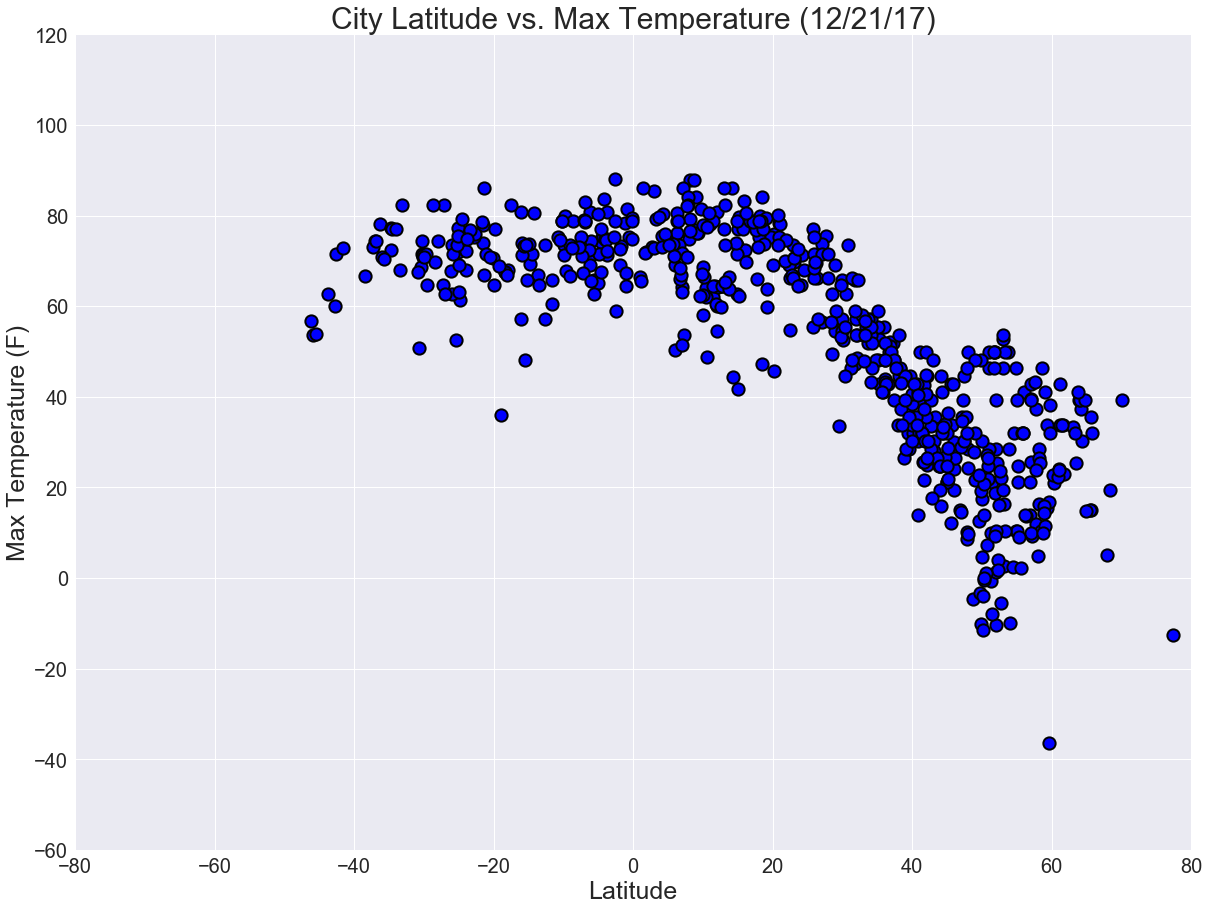

In [8]:
sampled_cities.plot(kind="scatter", x="Lat", y="Max Temp",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Max Temperature (12/21/17)', fontsize = 30)
plt.ylabel('Max Temperature (F)',  fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-60, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_temp')

# Latitude vs. Humidity Plot

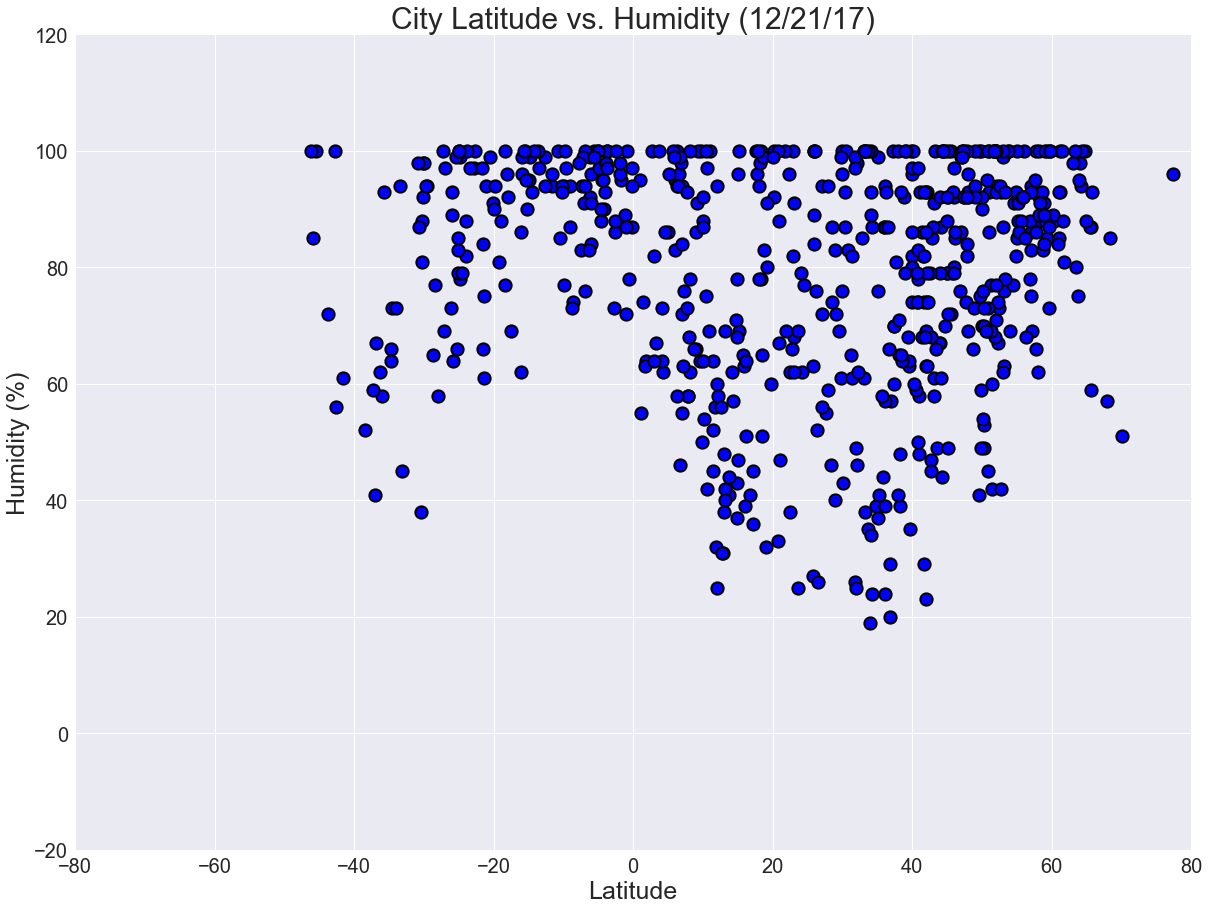

In [9]:
sampled_cities.plot(kind="scatter",x="Lat",y="Humidity",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Humidity (12/21/17)', fontsize = 30)
plt.ylabel('Humidity (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_humidity')

# Latitude vs. Cloudiness Plot

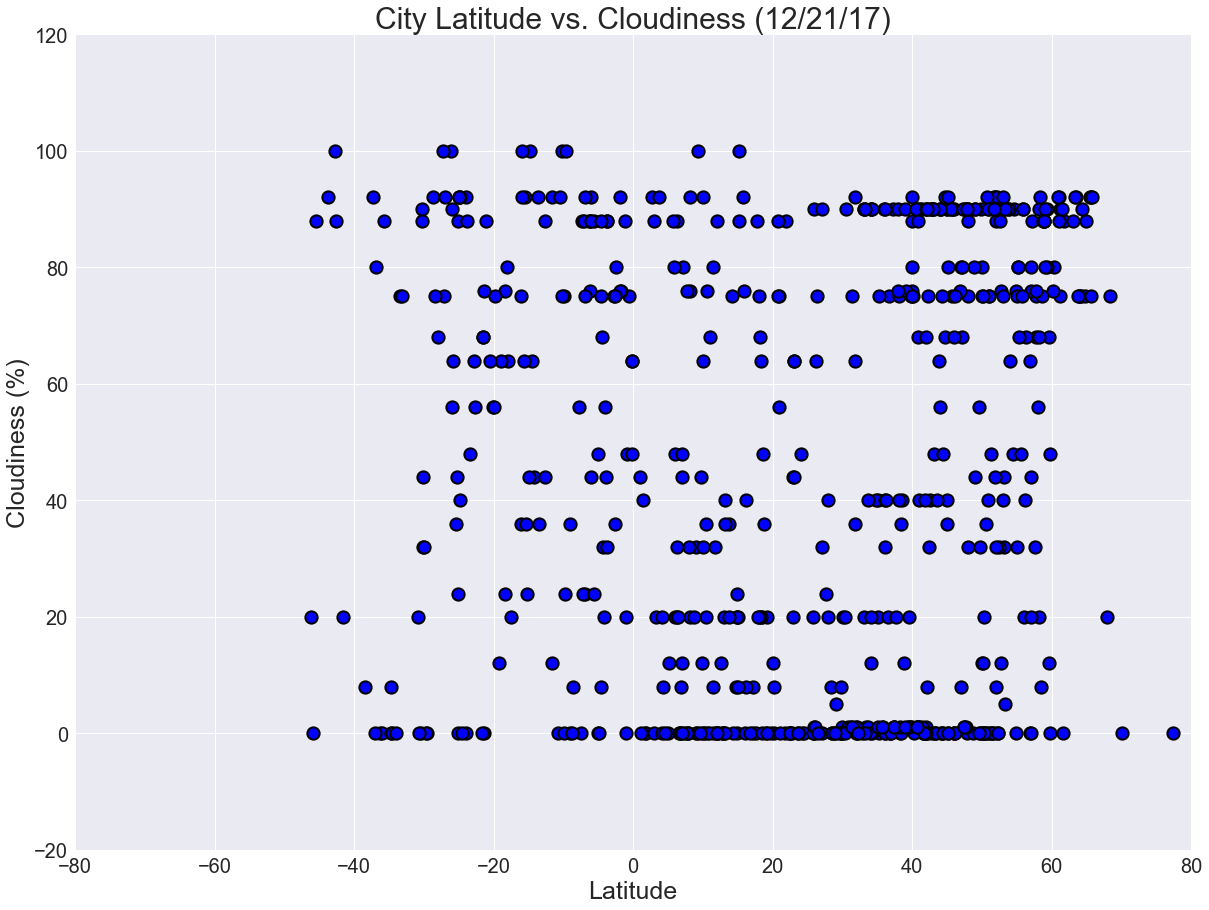

In [10]:
sampled_cities.plot(kind="scatter",x="Lat",y="Cloudiness",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Cloudiness (12/21/17)', fontsize = 30)
plt.ylabel('Cloudiness (%)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-20, 120)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_cloudiness')

# Latitude vs. Wind Speed Plot

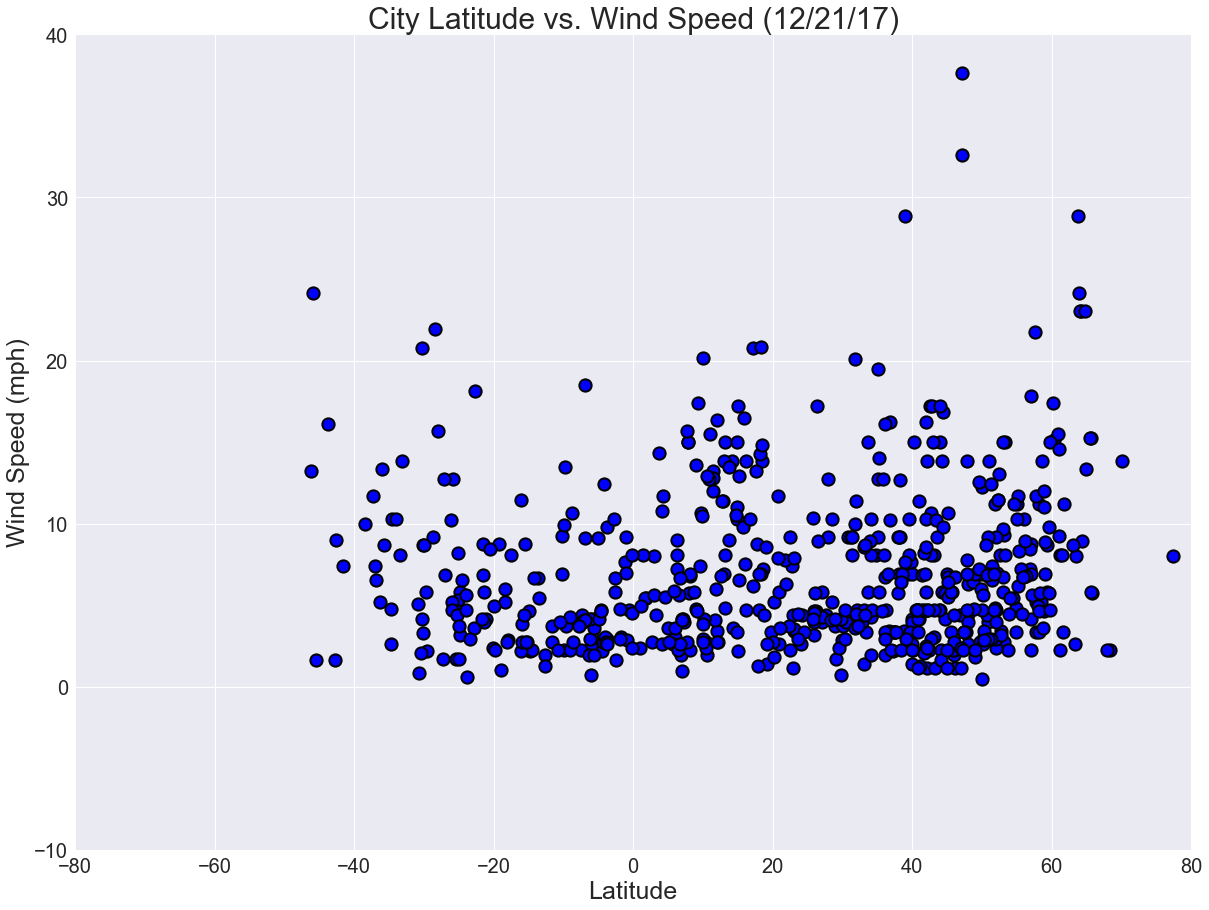

In [11]:
sampled_cities.plot(kind="scatter",x="Lat",y="Wind Speed",
                    grid=True, color="blue", edgecolor = "black", s =150, linewidth = 2, 
                    figsize =(20, 15))
plt.title('City Latitude vs. Wind Speed (12/21/17)', fontsize = 30)
plt.ylabel('Wind Speed (mph)', fontsize = 25)
plt.xlabel('Latitude', fontsize = 25)
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(-10, 40)
plt.tick_params(labelsize=20)
plt.show()
plt.savefig('latitude_windspeed')